[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/ELMED219-2026/blob/main/Lab3-GenAI-LLM/notebooks/07-trustworthy-ai.ipynb)

# Trustworthy AI - Pålitelig kunstig intelligens

**ELMED219 / BMED365 - Lab 3**

---

## Læringsmål

Etter denne notebooken skal du kunne:
- Definere hva som gjør AI "pålitelig" (trustworthy)
- Vurdere robusthet og usikkerhet i AI-systemer
- Beskrive konseptet "human-in-the-loop"
- Diskutere validering og testing av medisinsk AI
- Identifisere risikoer ved AI-drift (distributional shift)

## Innhold

1. [Hva er Trustworthy AI?](#1-hva-er-trustworthy-ai)
2. [Robusthet](#2-robusthet)
3. [Usikkerhetskvanfisering](#3-usikkerhetskvantifisering)
4. [Human-in-the-Loop](#4-human-in-the-loop)
5. [Validering og testing](#5-validering-og-testing)
6. [Kontinuerlig overvåking](#6-kontinuerlig-overvåking)

---

## 1. Hva er Trustworthy AI?

**Trustworthy AI** (pålitelig AI) er AI som er verdig tillit - dvs. at brukere kan stole på at systemet fungerer som forventet, er trygt, og at beslutninger er rettferdige og forklarbare.

### EUs syv krav til pålitelig AI

| Krav | Beskrivelse |
|------|-------------|
| **Menneskelig kontroll** | Mennesker kan overstyre og kontrollere AI |
| **Robusthet og sikkerhet** | Systemet er pålitelig og motstandsdyktig |
| **Personvern** | Data håndteres trygt og i samsvar med regelverk |
| **Transparens** | Brukere forstår hvordan AI fungerer |
| **Mangfold og ikke-diskriminering** | AI er rettferdig for alle grupper |
| **Samfunnsnytte** | AI bidrar positivt til samfunnet |
| **Ansvarlighet** | Klare ansvarsforhold og mulighet for klage |

In [1]:
# Trustworthiness-vurdering

def vurder_trustworthiness(system_info):
    """
    Enkel vurdering av AI-systems pålitelighet.
    """
    kriterier = {
        "menneskelig_kontroll": "Kan mennesker overstyre AI-beslutninger?",
        "robusthet": "Er systemet testet for edge cases og feil?",
        "forklarbarhet": "Kan beslutninger forklares til brukere?",
        "datakvalitet": "Er treningsdata representative og av god kvalitet?",
        "overvaking": "Overvåkes ytelse kontinuerlig?",
        "fallback": "Finnes det backup når AI feiler?"
    }
    
    return kriterier

print("TRUSTWORTHINESS SJEKKLISTE")
print("=" * 50)
for krit, sporsmal in vurder_trustworthiness({}).items():
    print(f"\n{krit.replace('_', ' ').title()}:")
    print(f"  → {sporsmal}")

TRUSTWORTHINESS SJEKKLISTE

Menneskelig Kontroll:
  → Kan mennesker overstyre AI-beslutninger?

Robusthet:
  → Er systemet testet for edge cases og feil?

Forklarbarhet:
  → Kan beslutninger forklares til brukere?

Datakvalitet:
  → Er treningsdata representative og av god kvalitet?

Overvaking:
  → Overvåkes ytelse kontinuerlig?

Fallback:
  → Finnes det backup når AI feiler?


---

## 2. Robusthet

Et robust AI-system håndterer:
- **Uventede input**: Data som er annerledes enn treningsdata
- **Adversarial attacks**: Bevisst manipulerte input
- **Systemfeil**: Nettverksbrudd, hardware-feil
- **Distributional shift**: Endringer i data over tid

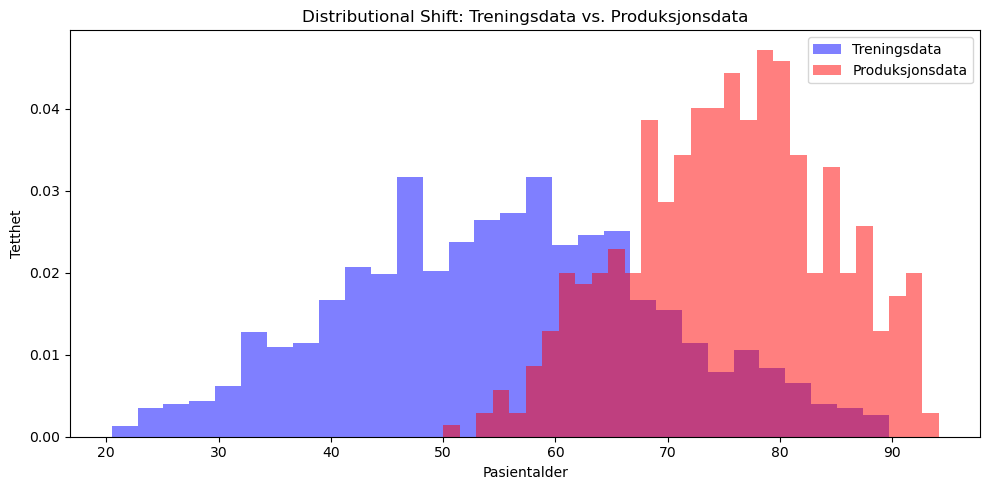


Konsekvens:
  - Treningsdata: gjennomsnitt 55.1 år
  - Produksjonsdata: gjennomsnitt 75.4 år
  - Modellen kan prestere dårligere på eldre pasienter
    fordi den har sett færre slike under trening.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Demonstrasjon av distributional shift

def demonstrer_distributional_shift():
    """
    Viser hvordan endringer i datafordeling kan påvirke AI-ytelse.
    """
    np.random.seed(42)
    
    # Treningsdata: Pasientalder (typisk sykehusavdeling)
    trenings_alder = np.random.normal(55, 15, 1000)
    trenings_alder = trenings_alder[(trenings_alder > 20) & (trenings_alder < 90)]
    
    # Produksjonsdata: Endret demografi (f.eks. ny geriatrisk avdeling)
    produksjon_alder = np.random.normal(75, 10, 500)
    produksjon_alder = produksjon_alder[(produksjon_alder > 50) & (produksjon_alder < 95)]
    
    return trenings_alder, produksjon_alder

trening, produksjon = demonstrer_distributional_shift()

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(trening, bins=30, alpha=0.5, label='Treningsdata', color='blue', density=True)
ax.hist(produksjon, bins=30, alpha=0.5, label='Produksjonsdata', color='red', density=True)
ax.set_xlabel('Pasientalder')
ax.set_ylabel('Tetthet')
ax.set_title('Distributional Shift: Treningsdata vs. Produksjonsdata')
ax.legend()
plt.tight_layout()
plt.show()

print("\nKonsekvens:")
print(f"  - Treningsdata: gjennomsnitt {trening.mean():.1f} år")
print(f"  - Produksjonsdata: gjennomsnitt {produksjon.mean():.1f} år")
print("  - Modellen kan prestere dårligere på eldre pasienter")
print("    fordi den har sett færre slike under trening.")

---

## 3. Usikkerhetskvantifisering

En pålitelig AI bør kunne si "jeg er usikker" når den er det.

### Typer usikkerhet

| Type | Beskrivelse | Kan reduseres med |
|------|-------------|-------------------|
| **Epistemisk** | Modellens usikkerhet (mangel på kunnskap) | Mer data |
| **Aleatorisk** | Iboende støy i dataene | Ikke reduserbar |

In [3]:
# Demonstrasjon av usikkerhet i prediksjoner

def simuler_prediksjon_med_usikkerhet():
    """
    Simulerer en AI-modell som gir usikkerhetsestimater.
    """
    pasient_caser = [
        {"beskrivelse": "Typisk case, mye lignende i data", 
         "prediksjon": 0.85, "usikkerhet": 0.05},
        {"beskrivelse": "Uvanlig case, få lignende i data",
         "prediksjon": 0.65, "usikkerhet": 0.25},
        {"beskrivelse": "Svært sjelden tilstand",
         "prediksjon": 0.55, "usikkerhet": 0.40}
    ]
    return pasient_caser

caser = simuler_prediksjon_med_usikkerhet()

print("PREDIKSJONER MED USIKKERHET")
print("=" * 60)

for i, case in enumerate(caser, 1):
    pred = case['prediksjon']
    usik = case['usikkerhet']
    
    print(f"\nCase {i}: {case['beskrivelse']}")
    print(f"  Prediksjon: {pred:.0%} ± {usik:.0%}")
    print(f"  Konfidensintervall: [{max(0, pred-usik):.0%}, {min(1, pred+usik):.0%}]")
    
    if usik > 0.20:
        print("  ⚠️  HØY USIKKERHET - vurder manuell gjennomgang")
    else:
        print("  ✓ Akseptabel usikkerhet")

PREDIKSJONER MED USIKKERHET

Case 1: Typisk case, mye lignende i data
  Prediksjon: 85% ± 5%
  Konfidensintervall: [80%, 90%]
  ✓ Akseptabel usikkerhet

Case 2: Uvanlig case, få lignende i data
  Prediksjon: 65% ± 25%
  Konfidensintervall: [40%, 90%]
  ⚠️  HØY USIKKERHET - vurder manuell gjennomgang

Case 3: Svært sjelden tilstand
  Prediksjon: 55% ± 40%
  Konfidensintervall: [15%, 95%]
  ⚠️  HØY USIKKERHET - vurder manuell gjennomgang


---

## 4. Human-in-the-Loop

**Human-in-the-loop** (HITL) betyr at mennesker er involvert i AI-beslutningsprosessen.

### Tre nivåer

```
HUMAN-IN-THE-LOOP (menneske i løkken)
  └── Menneske godkjenner HVER beslutning
  └── Høy kontroll, lav effektivitet

HUMAN-ON-THE-LOOP (menneske på løkken)
  └── Menneske overvåker og kan gripe inn
  └── Balansert tilnærming

HUMAN-OUT-OF-THE-LOOP (menneske ute av løkken)
  └── Full automatisering
  └── Høy effektivitet, lav kontroll
  └── IKKE anbefalt for medisinsk AI
```

In [4]:
# Eksempel på HITL-arbeidsflyt

def hitl_arbeidsflyt(ai_prediksjon, konfidenstterskel=0.80):
    """
    Demonstrerer en human-in-the-loop arbeidsflyt.
    """
    prediksjon = ai_prediksjon['prediksjon']
    konfidens = ai_prediksjon['konfidens']
    
    print("AI-STØTTET BESLUTNINGSPROSESS")
    print("=" * 50)
    print(f"AI-prediksjon: {prediksjon}")
    print(f"AI-konfidens: {konfidens:.0%}")
    print()
    
    if konfidens >= konfidenstterskel:
        print("→ HØY KONFIDENS")
        print("  Anbefaling presenteres til lege for bekreftelse.")
        print("  Lege kan godkjenne eller overstyre.")
        return "AUTOMATISK MED BEKREFTELSE"
    else:
        print("→ LAV KONFIDENS")
        print("  Flagger for MANUELL VURDERING.")
        print("  Lege må gjøre selvstendig vurdering.")
        print("  AI-prediksjon vises som en av flere input.")
        return "MANUELL VURDERING PÅKREVD"

# Test med to scenarioer
print("\n" + "="*60 + "\n")
print("SCENARIO 1:")
hitl_arbeidsflyt({"prediksjon": "Høy risiko for DVT", "konfidens": 0.92})

print("\n" + "="*60 + "\n")
print("SCENARIO 2:")
hitl_arbeidsflyt({"prediksjon": "Mulig pneumoni", "konfidens": 0.65})



SCENARIO 1:
AI-STØTTET BESLUTNINGSPROSESS
AI-prediksjon: Høy risiko for DVT
AI-konfidens: 92%

→ HØY KONFIDENS
  Anbefaling presenteres til lege for bekreftelse.
  Lege kan godkjenne eller overstyre.


SCENARIO 2:
AI-STØTTET BESLUTNINGSPROSESS
AI-prediksjon: Mulig pneumoni
AI-konfidens: 65%

→ LAV KONFIDENS
  Flagger for MANUELL VURDERING.
  Lege må gjøre selvstendig vurdering.
  AI-prediksjon vises som en av flere input.


'MANUELL VURDERING PÅKREVD'

---

## 5. Validering og testing

Før et medisinsk AI-system tas i bruk, må det gjennomgå omfattende testing.

### Teststrategier

1. **Retrospektiv validering**: Test på historiske data
2. **Prospektiv validering**: Test på nye pasienter (studie)
3. **Ekstern validering**: Test på data fra andre institusjoner
4. **Subgruppe-analyse**: Test på ulike pasientgrupper
5. **Stress-testing**: Test med edge cases og adversarial input

---

## 6. Kontinuerlig overvåking

AI-systemer må overvåkes etter implementering for å fange opp:

- **Ytelsesfall**: Synkende nøyaktighet over tid
- **Distributional shift**: Endringer i pasientpopulasjon
- **Feil-mønstre**: Systematiske feil på spesifikke grupper
- **Brukeratferd**: Hvordan leger faktisk bruker systemet

---

## Oppsummering

### Hovedpunkter

1. **Trustworthy AI** oppfyller syv krav: kontroll, robusthet, personvern, transparens, rettferdighet, samfunnsnytte, ansvarlighet
2. **Robusthet** betyr at systemet håndterer uventede situasjoner
3. **Usikkerhetskvantifisering** lar AI si "jeg vet ikke"
4. **Human-in-the-loop** sikrer menneskelig kontroll
5. **Kontinuerlig overvåking** fanger opp problemer etter implementering

### Refleksjonsoppgaver

1. Hvordan ville du designet et system som flagget AI-prediksjoner som trengte manuell vurdering?
2. Hvilke metrikker ville du overvåket for et AI-system på din fremtidige arbeidsplass?

---

*Neste notebook: [08 - Nevrosymbolsk AI](08-nevrosymbolsk-ai.ipynb)*